In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
Kaggle2018 = pd.read_csv('ks-projects-201801.csv')

In [99]:
Kaggle2018.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


In [100]:
practice= Kaggle2018.head(10)

In [102]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set_style('whitegrid')

In [103]:
Kaggle2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [104]:
Kaggle2018.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [105]:
state_color = ["Red", "Orange", "Yellow", "Green", "Blue", "Purple"]

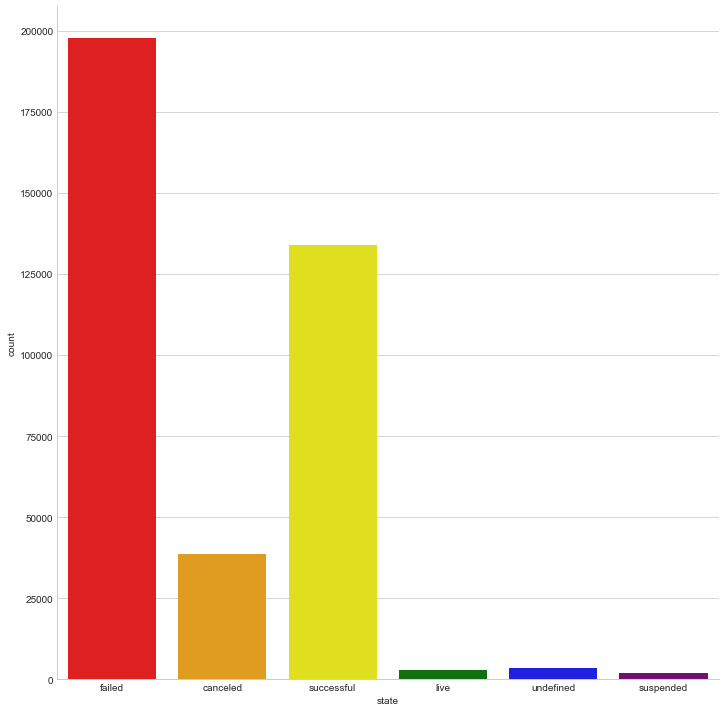

In [106]:
sns.factorplot('state',data=Kaggle2018,kind='count', size=10,palette=state_color)

In [108]:
set(Kaggle2018['main_category'])

{'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater'}

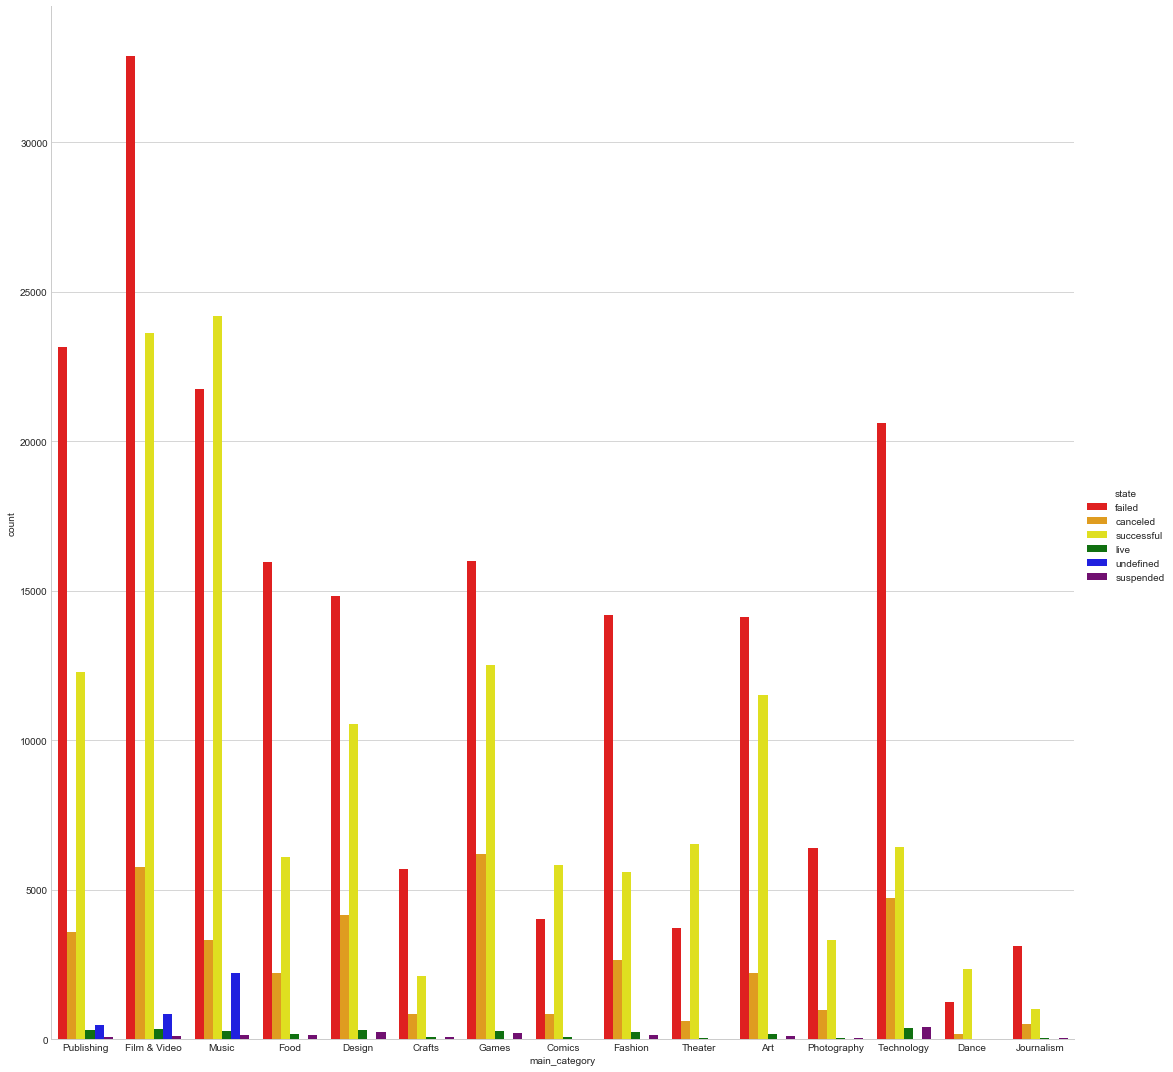

In [17]:
sns.factorplot('main_category',data=Kaggle2018,kind='count',hue='state' ,size=15, palette=state_color)


In [109]:
cat = pd.pivot_table(Kaggle2018,index=['main_category'], values = ['state'], aggfunc = len).sort_values('state',ascending = False)
cat

,state
main_category,
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816


In [110]:
cat = pd.DataFrame(cat.to_records())

In [113]:
top5 = list(set(cat['main_category'].head(5)))
top5

['Music', 'Publishing', 'Technology', 'Games', 'Film & Video']

In [112]:
top5cat = Kaggle2018.loc[Kaggle2018['main_category'].isin(top5)]

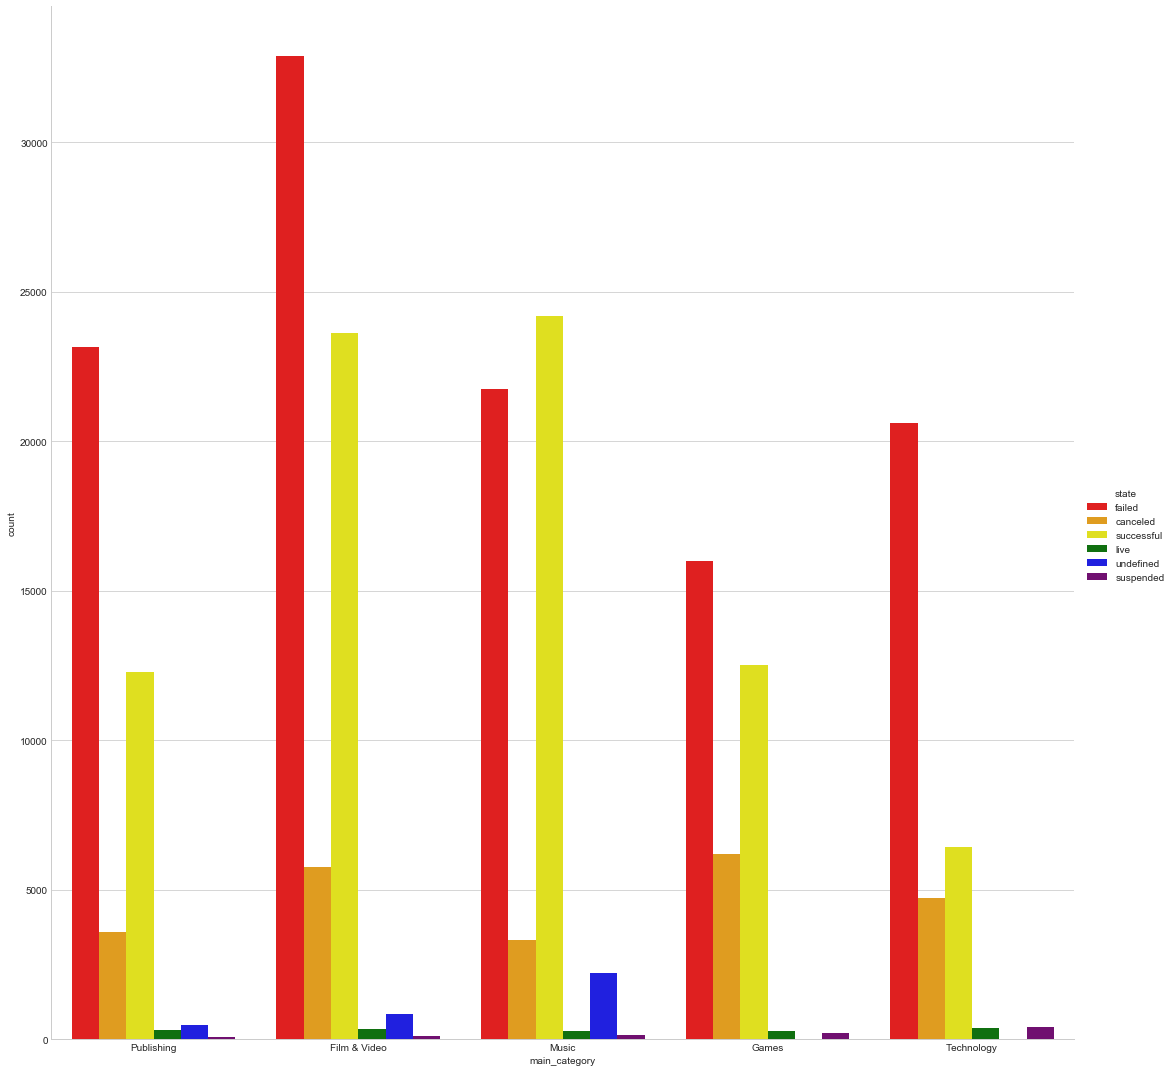

In [79]:
sns.factorplot('main_category',data=top5cat,kind='count',hue='state' ,size=15, palette=state_color)


In [114]:
success = Kaggle2018.loc[Kaggle2018['state'] =='successful']

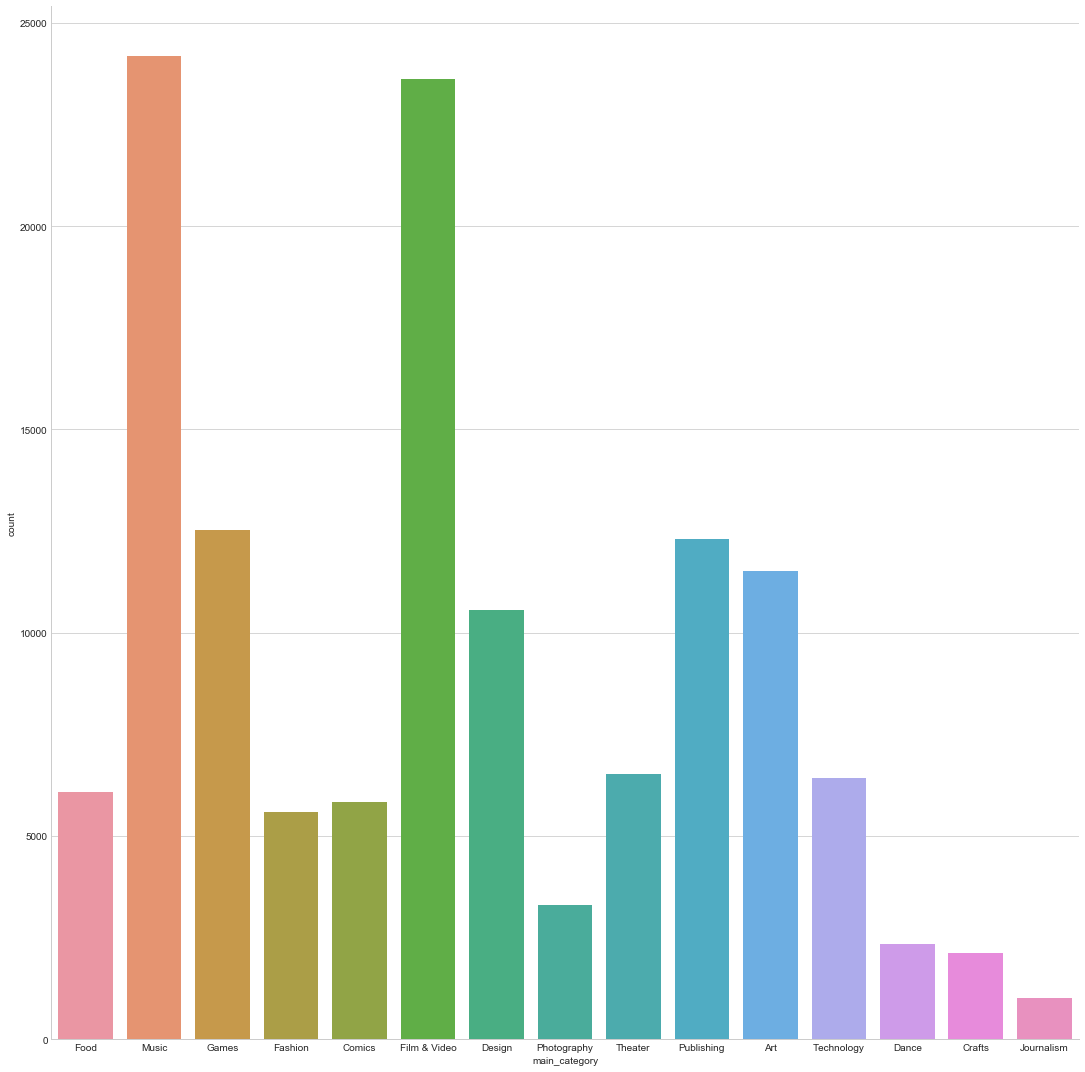

In [115]:
sns.factorplot('main_category',data=success,kind='count' ,size=15 )


In [116]:
music = Kaggle2018.loc[Kaggle2018['main_category'] =='Music']

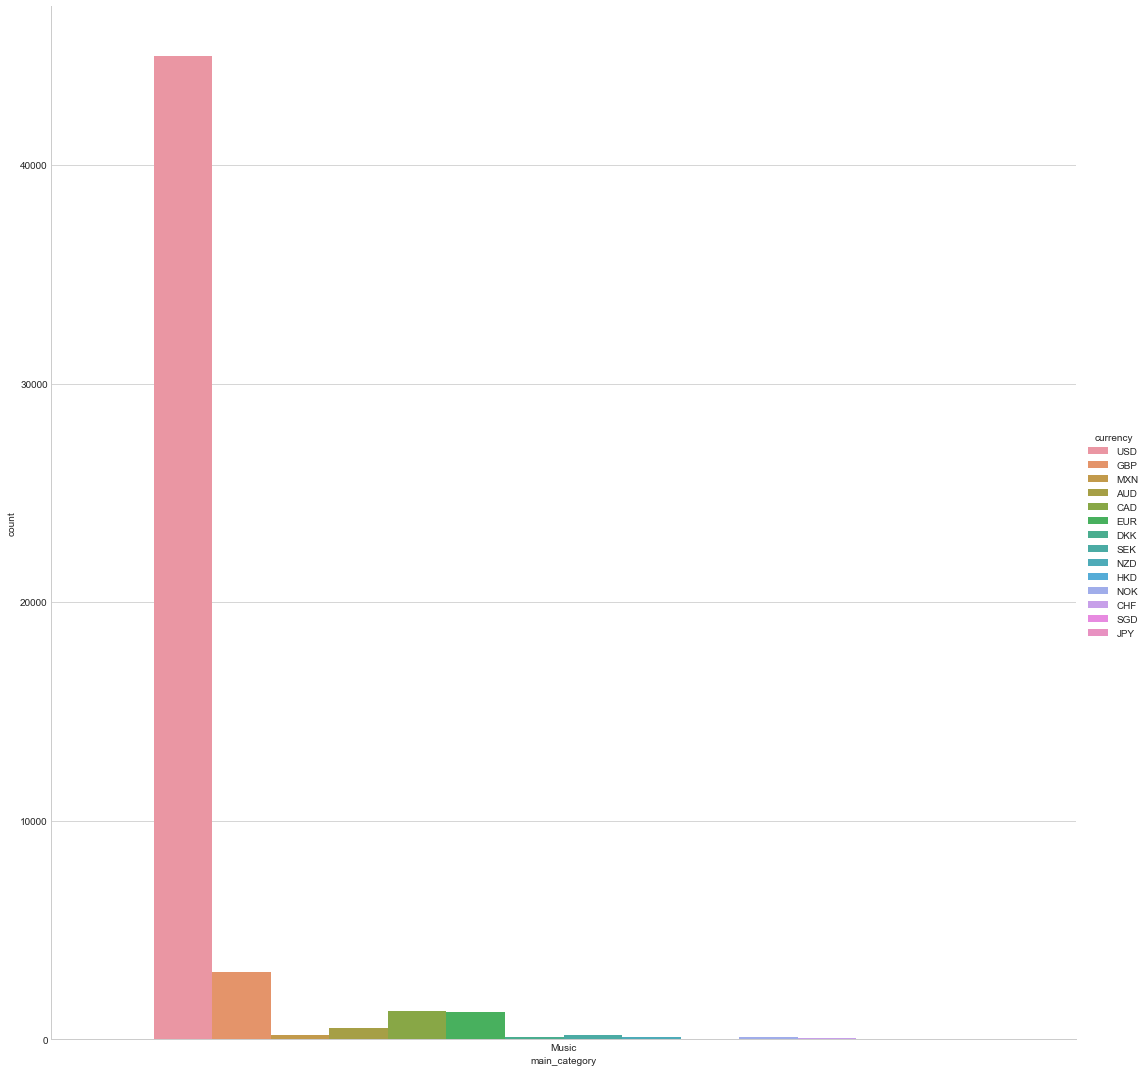

In [117]:
sns.factorplot('main_category',data=music,kind='count',hue='currency' ,size=15, )


In [118]:
tech = Kaggle2018.loc[Kaggle2018['main_category'] =='Technology']

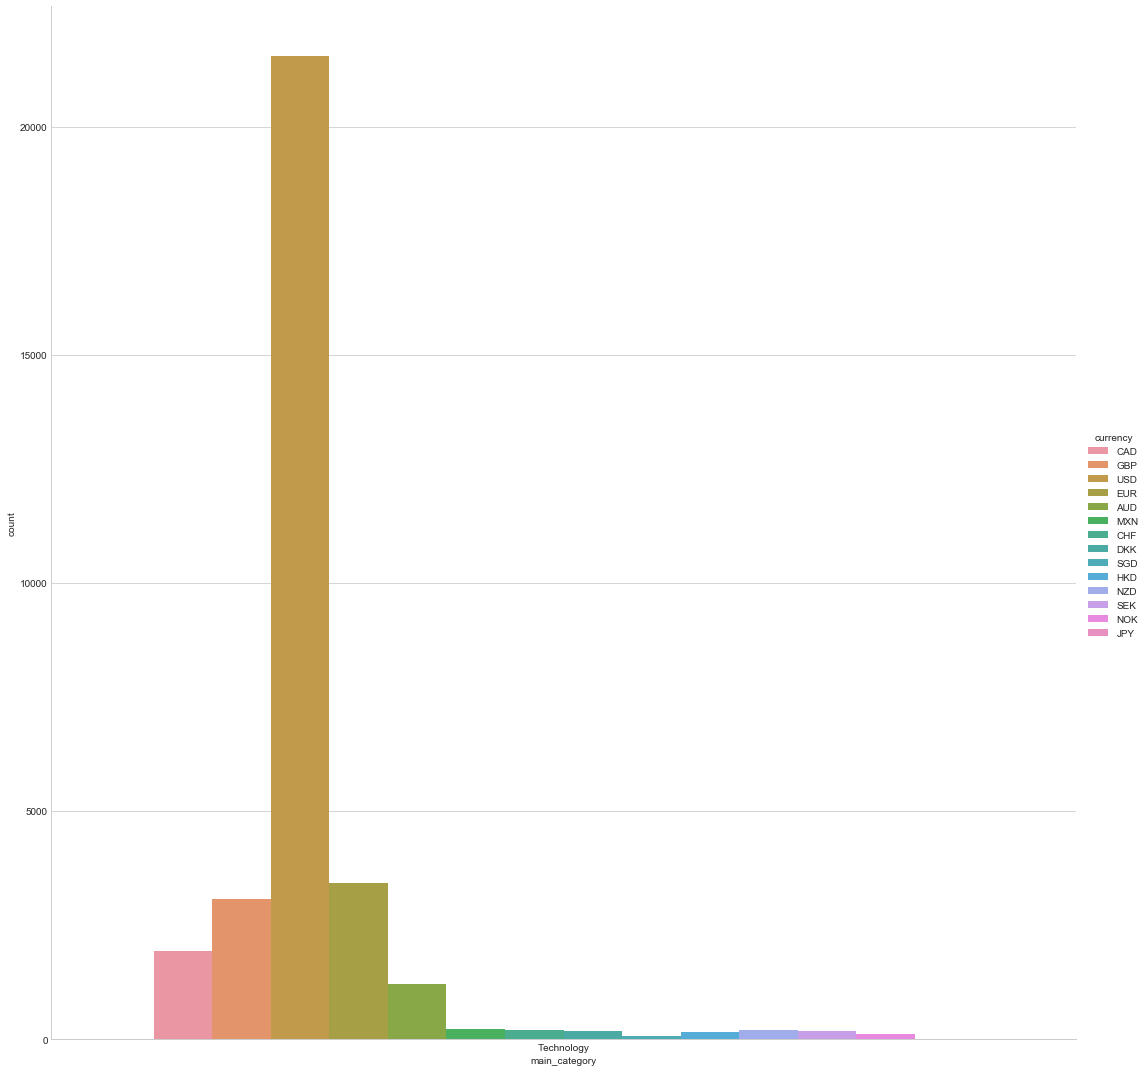

In [119]:
sns.factorplot('main_category',data=tech,kind='count',hue='currency' ,size=15, )


In [120]:
notUSD = Kaggle2018.loc[Kaggle2018['currency'] !='USD']

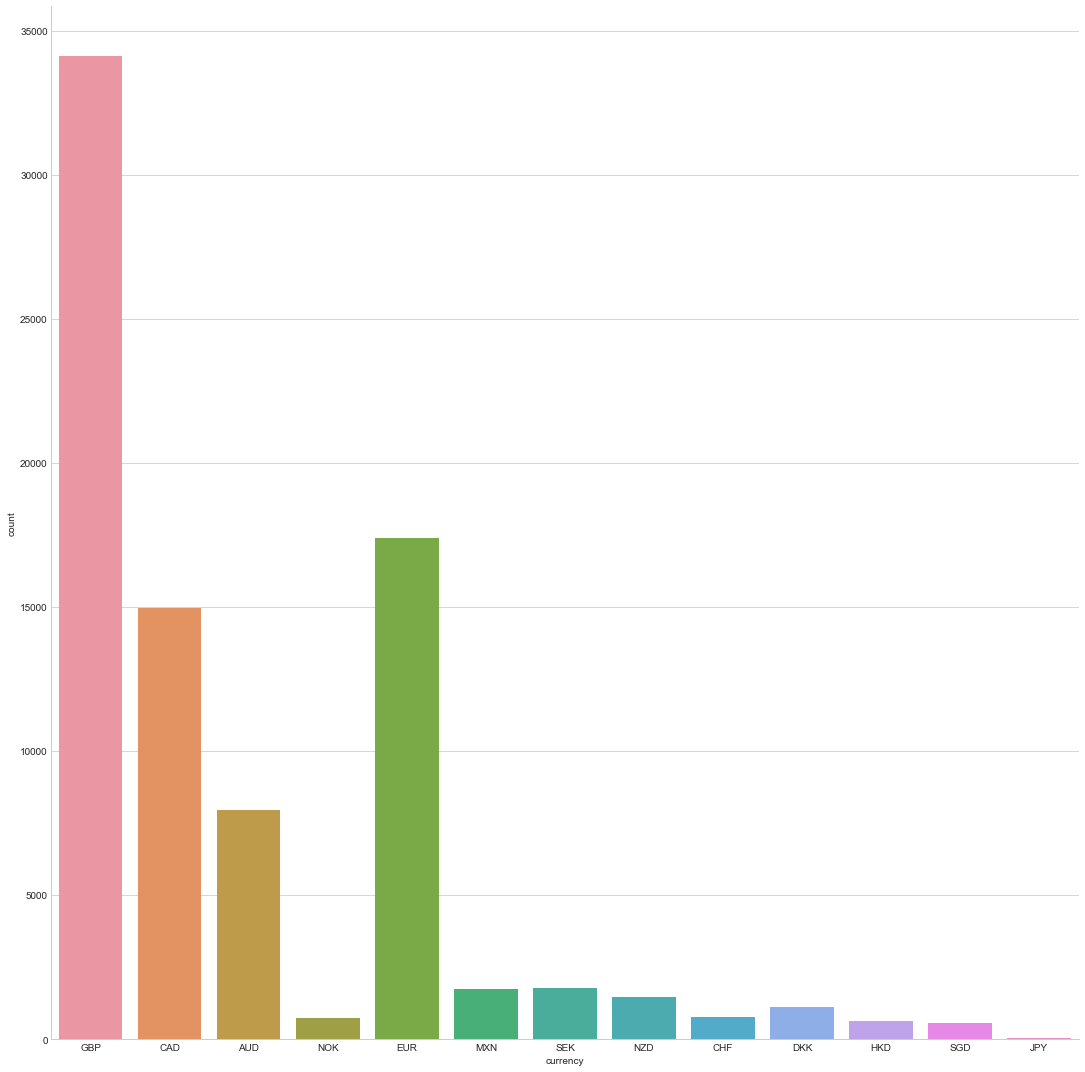

In [127]:
sns.factorplot('currency',data=notUSD,kind='count',size=15, )


In [141]:
notUSD = notUSD.loc[notUSD['state']=='successful']

In [146]:
notUSDcat = pd.pivot_table(notUSD,index=['main_category'], values = ['state'], aggfunc = len).sort_values('state',ascending = False)
notUSDcat = pd.DataFrame(notUSDcat.to_records())
notUSDcat5 = list(notUSDcat['main_category'].head(5))

In [147]:
notUSD5 = notUSD.loc[notUSD['main_category'].isin(notUSDcat5)]

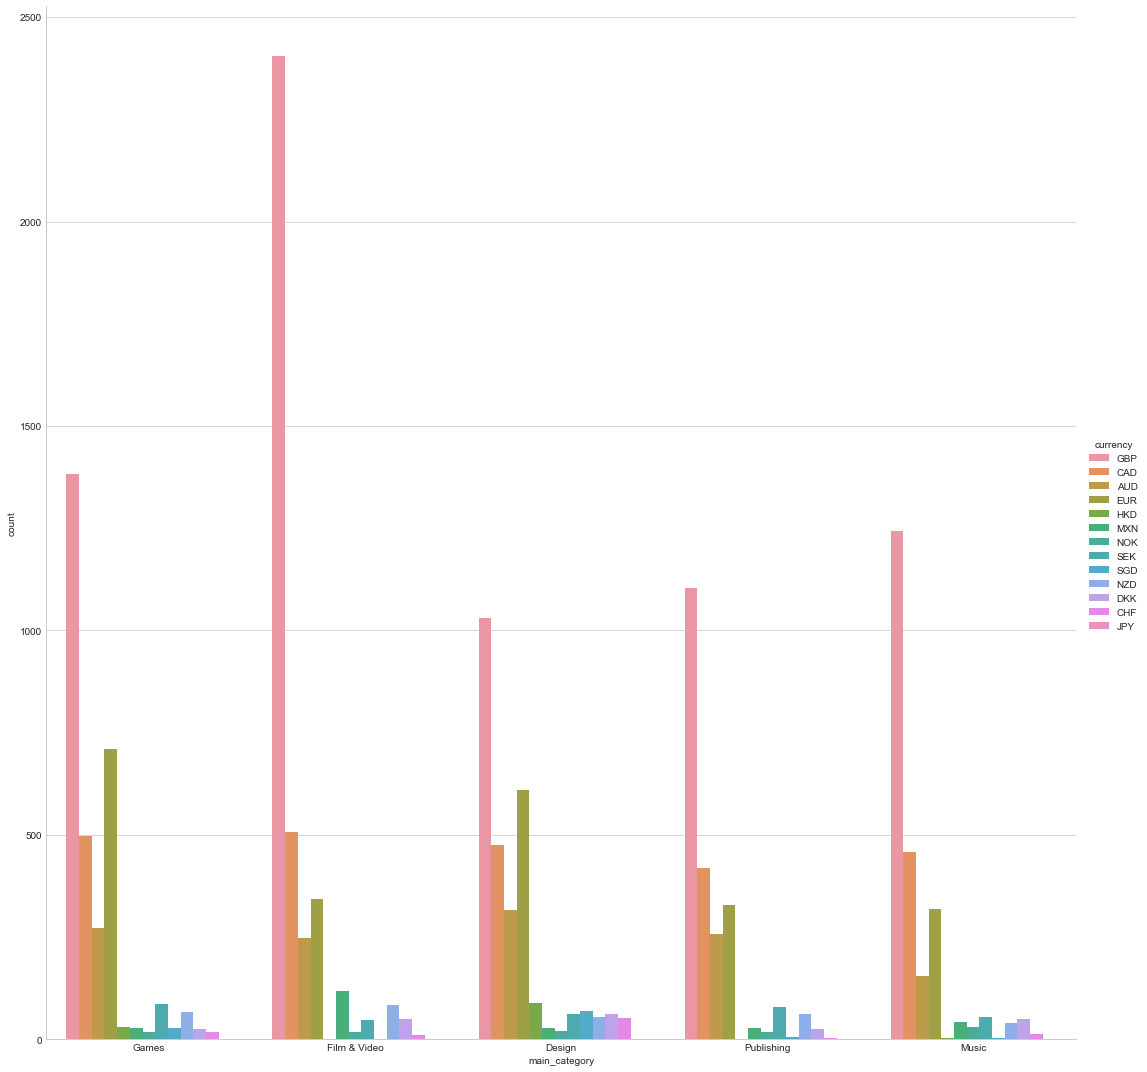

In [149]:
sns.factorplot('main_category',data=notUSD5,kind='count',hue='currency' ,size=15, )
